In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import zipfile
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aerial-cactus-identification/sample_submission.csv
/kaggle/input/aerial-cactus-identification/train.zip
/kaggle/input/aerial-cactus-identification/test.zip
/kaggle/input/aerial-cactus-identification/train.csv


In [2]:
working_dir = os.listdir('/kaggle/input/aerial-cactus-identification')
working_dir

['sample_submission.csv', 'train.zip', 'test.zip', 'train.csv']

In [3]:
with zipfile.ZipFile("/kaggle/input/aerial-cactus-identification/train.zip","r") as z:
    z.extractall("/kaggle/temp/")
with zipfile.ZipFile("/kaggle/input/aerial-cactus-identification/test.zip","r") as z:
    z.extractall("/kaggle/temp/test/")

print(len(os.listdir("/kaggle/temp/train")))
print(len(os.listdir("/kaggle/temp/test/test")))

17500
4000


In [4]:
# train_dir
os.listdir('/kaggle/temp/train')
train_dir = '/kaggle/temp/train'
train_dir

'/kaggle/temp/train'

In [5]:
# test_dir
os.listdir('/kaggle/temp/test/test')
test_dir = '/kaggle/temp/test/test'

In [6]:
csv_path ='/kaggle/input/aerial-cactus-identification/train.csv'
df = pd.read_csv(csv_path)

In [7]:
df.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [8]:
filenames = df['id']
filenames.head()

0    0004be2cfeaba1c0361d39e2b000257b.jpg
1    000c8a36845c0208e833c79c1bffedd1.jpg
2    000d1e9a533f62e55c289303b072733d.jpg
3    0011485b40695e9138e92d0b3fb55128.jpg
4    0014d7a11e90b62848904c1418fc8cf2.jpg
Name: id, dtype: object

In [9]:
file_path = [os.path.join(train_dir)]

In [10]:
file_path = [os.path.join(train_dir, fname) for fname in filenames]
file_path[:4]

['/kaggle/temp/train/0004be2cfeaba1c0361d39e2b000257b.jpg',
 '/kaggle/temp/train/000c8a36845c0208e833c79c1bffedd1.jpg',
 '/kaggle/temp/train/000d1e9a533f62e55c289303b072733d.jpg',
 '/kaggle/temp/train/0011485b40695e9138e92d0b3fb55128.jpg']

In [11]:
train_df = pd.DataFrame(data={'id':file_path, 'has_cactus': df['has_cactus']})
train_df.head()

,id,has_cactus
0,/kaggle/temp/train/0004be2cfeaba1c0361d39e2b00...,1
1,/kaggle/temp/train/000c8a36845c0208e833c79c1bf...,1
2,/kaggle/temp/train/000d1e9a533f62e55c289303b07...,1
3,/kaggle/temp/train/0011485b40695e9138e92d0b3fb...,1
4,/kaggle/temp/train/0014d7a11e90b62848904c1418f...,1


In [12]:
train_df = train_df.astype(np.str)

In [13]:
len(train_df)

17500

In [14]:
train_df = train_df[:-1000]
test_df = train_df [-1000:]
len(train_df), len(test_df)

(16500, 1000)

In [15]:
path = train_df['id'][0]
path

'/kaggle/temp/train/0004be2cfeaba1c0361d39e2b000257b.jpg'

In [16]:
sample_csv_path = '/kaggle/input/aerial-cactus-identification/sample_submission.csv'
sample_df = pd.read_csv(sample_csv_path)
sample_df.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.5
1,0017242f54ececa4512b4d7937d1e21e.jpg,0.5
2,001ee6d8564003107853118ab87df407.jpg,0.5
3,002e175c3c1e060769475f52182583d0.jpg,0.5
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.5


In [17]:
#import

from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
test_dir = '/kaggle/temp/test/test'
test_dir

'/kaggle/temp/test/test'

In [19]:
os.listdir(test_dir)[:5]

['62124a291ab400eff3f7ccc01abf5089.jpg',
 'cc7b2b90d4315e3e0ff932fe20f74b1f.jpg',
 '52678825f8c6064e520aebd048a7db88.jpg',
 '7208f5dc6ac9c9d30c55095254a15ca1.jpg',
 '513da61f8620fa5f08fd51d5e5c314bd.jpg']

In [20]:
path = train_df['id'][0]
path

'/kaggle/temp/train/0004be2cfeaba1c0361d39e2b000257b.jpg'

In [21]:
train_df.head()

,id,has_cactus
0,/kaggle/temp/train/0004be2cfeaba1c0361d39e2b00...,1
1,/kaggle/temp/train/000c8a36845c0208e833c79c1bf...,1
2,/kaggle/temp/train/000d1e9a533f62e55c289303b07...,1
3,/kaggle/temp/train/0011485b40695e9138e92d0b3fb...,1
4,/kaggle/temp/train/0014d7a11e90b62848904c1418f...,1


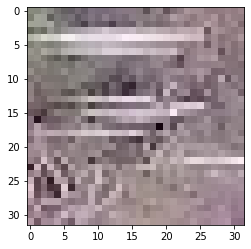

In [22]:
img_pil = Image.open(path)
image = np.array(img_pil)
image.shape
plt.imshow(image)
plt.show()

# Hyperparameter

In [23]:
input_shape = (32, 32, 3)
batch_size = 32
num_classes = 2
num_epochs = 10

learning_rate = 0.01

# Model

In [24]:
inputs = layers.Input(input_shape)
net = layers.Conv2D(64, (3, 3), padding='same')(inputs)
net = layers.Conv2D(64, (3, 3), padding='same')(net)
net = layers.Conv2D(64, (3, 3), padding='same')(net)
net = layers.BatchNormalization()(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)

net = layers.Conv2D(128, (3, 3), padding='same')(net)
net = layers.Conv2D(128, (3, 3), padding='same')(net)
net = layers.Conv2D(128, (3, 3), padding='same')(net)
net = layers.BatchNormalization()(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(256, (3, 3), padding='same')(net)
net = layers.Conv2D(256, (3, 3), padding='same')(net)
net = layers.Conv2D(256, (3, 3), padding='same')(net)
net = layers.BatchNormalization()(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(512, (3, 3), padding='same')(net)
net = layers.Conv2D(512, (3, 3), padding='same')(net)
net = layers.Conv2D(512, (3, 3), padding='same')(net)
net = layers.BatchNormalization()(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(512, (3, 3), padding='same')(net)
net = layers.Conv2D(512, (3, 3), padding='same')(net)
net = layers.Conv2D(512, (3, 3), padding='same')(net)
net = layers.BatchNormalization()(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net)

In [25]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate),
              metrics=['accuracy'])

# Data Preprocess

In [26]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    width_shift_range=0.3,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(
    rescale=1./255.
)

In [27]:
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='id',
    y_col='has_cactus',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='id',
    y_col='has_cactus',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary'
)

Found 16500 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames belonging to 2 classes.


# Train

In [28]:
model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=num_epochs,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
516/516 [==============================] - 24s 36ms/step - loss: 1.0981 - accuracy: 0.7281 - val_loss: 0.4780 - val_accuracy: 0.7440
Epoch 2/10
516/516 [==============================] - 17s 33ms/step - loss: 0.3587 - accuracy: 0.8093 - val_loss: 1.4918 - val_accuracy: 0.7730
Epoch 3/10
516/516 [==============================] - 17s 34ms/step - loss: 0.2927 - accuracy: 0.8704 - val_loss: 4.6686 - val_accuracy: 0.7510
Epoch 4/10
516/516 [==============================] - 17s 32ms/step - loss: 0.2238 - accuracy: 0.9071 - val_loss: 0.3831 - val_accuracy: 0.7950
Epoch 5/10
516/516 [==============================] - 17s 34ms/step - loss: 0.2067 - accuracy: 0.9207 - val_loss: 0.3180 - val_accuracy: 0.8750
Epoch 6/10
516/516 [==============================] - 16s 32ms/step - loss: 0.2181 - accuracy: 0.9186 - val_loss: 0.1725 - val_accuracy: 0.9250
Epoch 7/10
516/516 [==============================] - 18s 34ms/step - loss: 0.1547 - accuracy: 0.9431 - val_loss: 0.5884 - val_accuracy:

# Evaluate

In [29]:
test_dir

'/kaggle/temp/test/test'

In [30]:
sample_df.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.5
1,0017242f54ececa4512b4d7937d1e21e.jpg,0.5
2,001ee6d8564003107853118ab87df407.jpg,0.5
3,002e175c3c1e060769475f52182583d0.jpg,0.5
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.5


In [31]:
preds = []

for fname in tqdm_notebook(sample_df['id']):
    path = os.path.join(test_dir, fname)
    
    img_pil = Image.open(path)
    image = np.array(img_pil)
    
    pred = model.predict(image[tf.newaxis, ...])
    pred = np.argmax(pred)
    preds.append(pred)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/4000 [00:00<?, ?it/s]

In [32]:
submission_df = pd.DataFrame(data={'id':sample_df['id'], 'has_cactus':preds})

In [33]:
submission_df.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,1
1,0017242f54ececa4512b4d7937d1e21e.jpg,1
2,001ee6d8564003107853118ab87df407.jpg,1
3,002e175c3c1e060769475f52182583d0.jpg,1
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,1


In [34]:
submission_df.to_csv('submission.csv', index=False)

In [35]:
os.listdir()

['submission.csv', '__notebook__.ipynb']